# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Loading the dataset

In [2]:
# loading data
from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
  data = pd.read_csv(filename)

Saving EasyVisa.csv to EasyVisa.csv


In [3]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset.

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset.

In [6]:
df.shape

(25480, 12)

* The dataset has 36,275 rows and 19 columns of data

### Check the data types of the columns for the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations -**
* booking_status is the dependent variable - type object.
* All the independent variables are a mix of int64, float64 and objects.

### Summary of the dataset.

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations -**
* There is a lot of NaN values in the data.
* Booking_ID is not essential to the data and will be dropped.
* Since booking_status is an object I will need to convert it so that it can be quantified.
* The other type object culumns will need to be dealt with as well.






### Drop "Booking_ID"

In [9]:
df.drop(["Booking_ID"], axis=1, inplace=True)

KeyError: "['Booking_ID'] not found in axis"

### Check for missing values

In [10]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing values in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#### Load the functions need to be defined to carry out the EDA.

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [13]:
# function to plot histogram box plot

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate analysis

In [14]:
# print all info again
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations on no_of_adults

In [16]:
labeled_barplot(df, "no_of_adults", perc=True)

KeyError: 'no_of_adults'

* 72% of the bookings were for 2 people.
* Less than 7% of the booking were for 3 or more people.

#### Observations on no_of_children

In [17]:
labeled_barplot(df, "no_of_children", perc=True)

KeyError: 'no_of_children'

* 92.6% of the bookings had zero children.

#### Observations on no_of_weekend_nights

In [ ]:
labeled_barplot(df, "no_of_weekend_nights", perc=True)

* Over 50% of the bookings are during one or two weekend nights.

#### Observations on no_of_week_nights

In [ ]:
labeled_barplot(df, "no_of_week_nights", perc=True)

* Almost 80 % of the bookings are for 1-3 week nights.

#### Observations on type_of_meal_plan

In [ ]:
labeled_barplot(df, "type_of_meal_plan", perc=True)

* The vast majority of the bookings, 76.7%, choose meal plan 1.

#### Observations on required_car_parking_space

In [ ]:
labeled_barplot(df, "required_car_parking_space", perc=True)

* Only 3.1% of the bookings require a parking space.

#### Observations on room_type_reserved

In [ ]:
labeled_barplot(df, "room_type_reserved", perc=True)

* The vast majority of the bookings, 77.5%, choose room_type_1.
* 16.7% of the bookings choose room_type_4.
* All other room types are below 3% bookings.

#### Observations on lead_time

In [ ]:
histogram_boxplot(df, "lead_time")

* More than 5000 bookings happen either the the day before or same day.
* The average lead time is around 75 days.

#### Observations on arrival_year

In [ ]:
labeled_barplot(df, "arrival_year", perc=True)

* 82% of the bookings take place in 2018, the rest in 2017.

#### Observations on arrival_month

In [ ]:
labeled_barplot(df, "arrival_month", perc=True)

* October has the highest percentage of arrivals, 14.7%.
* January has the lowest, 2.8%.

#### Observations on arrival_date

In [ ]:
labeled_barplot(df, "arrival_date", perc=True)

* Arrival date is relatively evenly spread out.
* More useful data would likely be arrival day of the week.

#### Observations on market_segment_type

In [ ]:
labeled_barplot(df, "market_segment_type", perc=True)

* 64% of the bookings are made online.
* 29% of the bookings happen offline.
* It would be helpful if offline was further defined.

#### Observations on repeated_guest

In [ ]:
labeled_barplot(df, "repeated_guest", perc=True)

* Only 2.6% of bookings are repeat guests.

#### Observations on no_of_previous_cancellations

In [ ]:
labeled_barplot(df, "no_of_previous_cancellations", perc=True)

* 99.1% of bookinds have not canceled before.
* Suprisingly, 0.1% of bookings have 11 previous cancelations. That warrents further investigation.

#### Observations on no_of_previous_bookings_not_canceled

In [ ]:
labeled_barplot(df, "no_of_previous_bookings_not_canceled", perc=True)

* 97.8% of previous bookings were not canceled prior to the current booking.

#### Observations on avg_price_per_room

In [ ]:
histogram_boxplot(df, "avg_price_per_room")

* This chart has a lot of complimentary room prices and some extreme outliers that are skewing the data. I will look into it further.

In [ ]:
# find out what market segment is getting the complimentary rooms.
filtered_df = df[df["avg_price_per_room"] == 0]

# view the "market_segment_type" for these bookings
market_segment_types = filtered_df["market_segment_type"]

# display the unique market segment types for these bookings
comp_rate_market_segment_types = market_segment_types.unique()
print(comp_rate_market_segment_types)

In [ ]:
# lets look at the information for the outlier > $500
five_houndred_filtered_df = df[df["avg_price_per_room"] > 500].T

# Now, you can view all the information for these bookings
print(five_houndred_filtered_df)

* The extreme outlier was one booking for one night at $540 that was canceled. This appears to be a clear mistake in the data so I will delete this row.

In [ ]:
# drop row 33114
df.drop(33114, inplace=True)

In [ ]:
# now lets filter out the comp rates
no_comp_rate = df[df["avg_price_per_room"] != 0]

In [ ]:
# plot no_comp_rate
histogram_boxplot(no_comp_rate, "avg_price_per_room")

* With the comp room rates and the $540 booking removed the mean and median adjusted slightly.

#### Observations on no_of_special_requests

In [ ]:
labeled_barplot(df, "no_of_special_requests", perc=True)

* 54.5% of bookings had no special requestss.
* 31.4% of bookings had 1 special request.

#### Observations on booking_status

In [ ]:
labeled_barplot(df, "booking_status", perc=True)

* 67.2% of bookings were kept.
* 32.8% of bookings were canceled.

### Bivariate Analysis

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Creating functions that will help us with further analysis.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Market segment and price

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Online bookings have the highest average price.
* Aviation pricing is very consistant.

#### Market segement and booking status.

In [ ]:
stacked_barplot(df, "market_segment_type", "booking_status")

* Corporate bookings have the lowest cancelation rate.

#### Special requests and booking status.

In [ ]:
stacked_barplot(df, "no_of_special_requests", "booking_status") ## Complete the code to plot stacked barplot for no of special requests and booking status

* Special requests and cancelation rate have a inverse relationship.

#### Special requests and room rate without outliers.

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(df, x="no_of_special_requests", y="avg_price_per_room", showfliers=False)
plt.show()

ValueError: Could not interpret value `no_of_special_requests` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

* The room rate increases with number of special requests.

#### Average price and booking status

In [ ]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

* There is a slight increase in bookings with higher room rates but I dont think its enough to be significant.

#### Booking status and lead time.

In [ ]:
distribution_plot_wrt_target(df, "lead_time", "booking_status") ## Complete the code to find distribution of lead time wrt booking status

* The longer the lead time, the higher number of cancelations.

#### Couples with kids

In [ ]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

In [ ]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

In [ ]:
stacked_barplot(family_data, "no_of_family_members", "booking_status")

* I do not see a correlation between number of family members and booking status.

#### Length of stay

In [ ]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape

In [ ]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

In [ ]:
stacked_barplot(stay_data, "total_days", "booking_status") ## Complete the code to plot stacked barplot for total days and booking status

* Longer stays tend to be cancele more frequesntly.

#### Repeat guests

In [ ]:
stacked_barplot(df, "repeated_guest", "booking_status")

* Repeat guests typically do not cancel their booking.

#### Bookings by month

In [ ]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* Bookings are the lowest in January and steadily increase until October then drop until November and then remain relatively flat in December.

#### Cancelations by month.

In [ ]:
stacked_barplot(df, "arrival_month", "booking_status")

* Most of the cancelations are during the middle of the year.

#### Room rate by month

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(df, x="arrival_month", y="avg_price_per_room") ## Complete the code to create lineplot between average price per room and arrival month
plt.show()

* The average price per room is highest between April and September, this period also has the highest cancelations.

#### Room type reserved

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="room_type_reserved", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

In [ ]:
stacked_barplot(df, "room_type_reserved", "booking_status")

In [ ]:
plt.figure(figsize=(15, 6))
sns.catplot(
    x="room_type_reserved",
    y="avg_price_per_room",
    hue="booking_status",
    data=df,
    kind="point",
    palette="Set1",
)
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel("Room Type Reserved")
plt.ylabel("Average Price per Room")
plt.title("Interaction Plot between Room Type, Booking Status, and Average Price")

# Show the plot
plt.show()

* Room type 7 has the highest cancelations.
* Room type 3 has the second highest cancelations.

#### EDA Observations

* The busiest months in the hotel are October and September.
* Most of the guests come from online bookings.
* Online and offline prices have a wide range. Corporate bookings have a much tighter range of prices. Aviation bookings appear to be a fixed price.
* 32.8% of bookings were canceled.
* Repeat guests cancel their bookings only 1.7% of the time.
*  The more special requests a customer has the less likely they are to cancel their booking.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing values

In [ ]:
df.isna().sum()

* There are no missing values that need to be treated.

#### Feature engineering.

#### Create label encoding for type of meal plan

In [ ]:
# Create a mapping dictionary
mapping = {
    "Not Selected": 0,
    "Meal Plan 1": 1,
    "Meal Plan 2": 2,
    "Meal Plan 3": 3
}

# Apply label encoding
df["type_of_meal_plan"] = df["type_of_meal_plan"].map(mapping)

#### Create label encoding for room type reserved.

In [ ]:
df["room_type_reserved"].unique()

In [ ]:
# Create a mapping dictionary
mapping = {
    "Room_Type 1": 1,
    "Room_Type 2": 2,
    "Room_Type 3": 3,
    "Room_Type 4": 4,
    "Room_Type 5": 5,
    "Room_Type 6": 6,
    "Room_Type 7": 7
}

# Apply label encoding
df["room_type_reserved"] = df["room_type_reserved"].map(mapping)

#### Create label encoding for market segment.

In [ ]:
df["market_segment_type"].unique()

In [ ]:
# Create a mapping dictionary
mapping = {
    "Offline": 1,
    "Online": 2,
    "Corporate": 3,
    "Aviation": 4,
    "Complementary": 5,
}

# Apply label encoding
df["market_segment_type"] = df["market_segment_type"].map(mapping)

#### Outlier detection

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout(pad=2)
    plt.title(variable)

plt.show()

* There are no outliers other than what is expected.

## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with statsmodels library)

#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Drop the original "booking_status" column from X
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding constant
X = sm.add_constant(X)

# One-hot encode the categorical columns in X
X = pd.get_dummies(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

#### Building Logistic Regression Model

In [ ]:
# Encode 'booking_status' as binary: 'Canceled' to 1, 'Not_Canceled' to 0
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Split the DataFrame into X and Y again
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# Adding a constant
X = sm.add_constant(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

print(lg.summary())

* no of children, arrival date, and no of previous bookings not canceled have hight p-values.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

#### Multicollinearity

In [ ]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

#### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()
print(lg1.summary())

* This took care of the high p-values.
* There are no longer any high p-values.

In [19]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train

Training performance:


NameError: name 'model_performance_classification_statsmodels' is not defined

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

#### Checking model performance on the training set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

* True Negative is 59.72%
* False Positive is 7.24%
* False Negative is 13.28%
* True Positive is 19.76%

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

#### ROC-AUC
* ROC-AUC on training set

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [20]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

NameError: name 'roc_curve' is not defined

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

* True Negative is 50.70%
* False Positive is 16.26%
* False Negative is 7.19%
* True Positive is 25.86%
* This improved the TP rate by 6.1%

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

* This improved the recall by almost 0.2

#### Let's use Precision-Recall curve and see if we can find a better threshold

In [ ]:
from sklearn.metrics import precision_recall_curve

y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve,
) ## Complete the code to create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold

* True Negative is 56.46%
* False Positive is 10.49%
* False Negative is 11.08%
* True Positive is 21.96%
* This improved the TP rate by only 2.2%

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

* This improved the recall by 0.06%

#### Let's check the performance on the test set

**Using model with default threshold**

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test) ## Complete the code to create confusion matrix for X_test1 and y_test

* True Negative is 60.09%
* False Positive is 7.80%
* False Negative is 12.70%
* True Positive is 19.41%

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test) ## Complete the code to check performance on X_test1 and y_test

print("Test performance:")
log_reg_model_test_perf

* ROC curve on test set

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.37**

In [21]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.37) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

NameError: name 'confusion_matrix_statsmodels' is not defined

* True Negative is 54.60%
* False Positive is 13.30%
* False Negative is 8.96%
* True Positive is 23.15%
* This decreased the TP rate by more than 3%

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

**Using model with threshold = 0.42**

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.42) ## Complete the code to create confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

* True Negative is 56.79%
* False Positive is 11.11%
* False Negative is 10.59%
* True Positive is 21.51%

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=0.42
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

#### Model performance summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

* The threshold of 0.37 has the highest recall rate.

### Model performance evaluation

* We want to predict which bookings will be canceled.


### How to reduce this cancelations i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building decision tree model

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

#### Checking model performance on training set

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

* True Negative is 66.86%
* False Positive is 0.10%
* False Negative is 0.52%
* True Positive is 32.53%

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

* Very good improvements across the board.

#### Checking model performance on test set

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

* True Negative is 61.26%
* False Positive is 6.63%
* False Negative is 6.19%
* True Positive is 25.91%

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

* Good improvements from our previous test model.

In [ ]:
# Before pruning lets check the important features.
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time and average price per room are the most important features.

#### Pruning the tree

**Pre-Pruning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

#### Checking performance on training set

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* True Negative is 56.73%
* False Positive is 10.22%
* False Negative is 6.77%
* True Positive is 26.27%

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

#### Checking model performance on test set

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* True Negative is 57.64%
* False Positive is 10.25%
* False Negative is 6.63%
* True Positive is 25.47%

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

* We are getting a simplified tree after pre-pruning.

#### Visualizing the Decision Tree

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Cost Complexity Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* This shows a good balance between the number of nodes, alpha and depth.

#### F1 Score vs alpha for training and testing sets

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

NameError: name 'ccp_alphas' is not defined

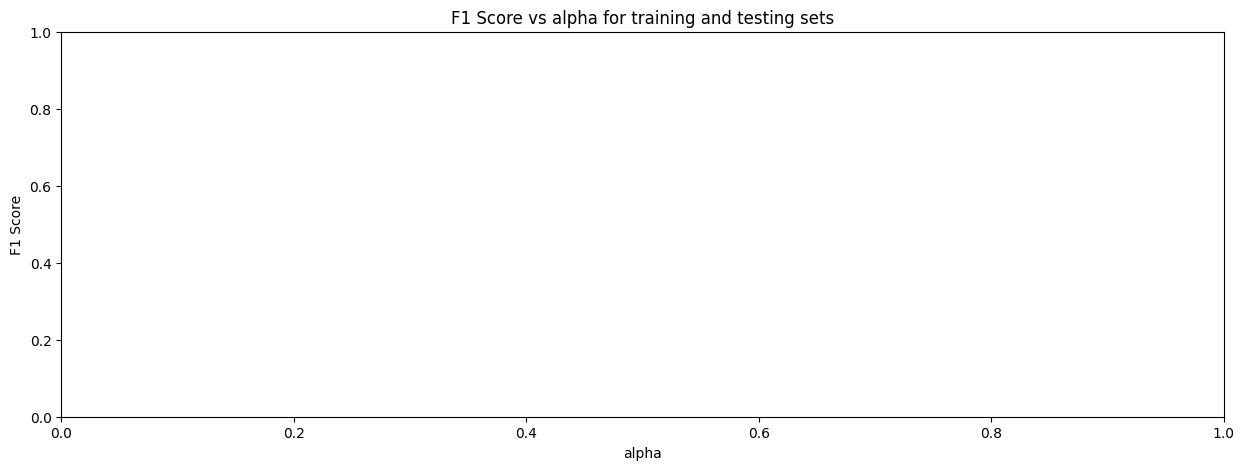

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

* F1 and alpha have a good correlation of both train and test models.

In [ ]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

#### Checking performance on training set

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* True Negative is 61.35%
* False Positive is 5.61%
* False Negative is 2.03%
* True Positive is 31.01%

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

#### Checking performance on test set

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

* True Negative is 58.95%
* False Positive is 8.94%
* False Negative is 4.49%
* True Positive is 27.61%

In [ ]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

In [ ]:
plt.figure(figsize=(20, 50))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparison of Models and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_test_comp_df

* Decision tree with post-pruning is giving the highest recall on the test set.
* Post-pruning model has the second highest accuracy, precision and highest F1.
* The post-pruning model is more complex but it is the most accurate.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

###ERA Observations
* The busiest months in the hotel are October and September.
* Most of the guests come from online bookings.
* Online and offline prices have a wide range. Corporate bookings have a much tighter range of prices. Aviation bookings appear to be a fixed price.
* 32.8% of bookings were canceled.
* Repeat guests cancel their bookings only 1.7% of the time.
* The more special requests a customer has the less likely they are to cancel their booking.

### Recommendations

* The busiest months are October and September. Consider implementing dynamic pricing strategies during peak seasons to maximize revenue while offering discounts during off-peak periods to attract more guests.
* Given that most guests come from online bookings, invest in improving your online booking platform. Enhance the user experience, offer flexible cancellation policies, and provide incentives for direct bookings through your website.
* Analyze the wide range of prices for online and offline bookings. Consider implementing a more structured pricing strategy for these channels. For aviation bookings with fixed prices, explore partnerships or special offers to attract more guests.
* The overall cancellation rate is 32.8%, which is relatively high. Investigate the reasons behind cancellations and categorize them. Identify common patterns and tailor your cancellation policies accordingly. Prioritizing customer feedback for cancellations would help.
* Encourage repeat guests by offering loyalty programs and incentives that reduce the likelihood of cancellations. Provide benefits such as room upgrades, discounts, or exclusive offers for returning customers.
* Acknowledge the inverse relationship between the number of special requests and the cancellation rate. Encourage guests to make special requests, as this seems to make them less likely to cancel. This could be due to increased engagement and commitment to their stay.
* Given that lead time has the highest relevance importance and longer lead times correlate to higher cancelations, implimenting a higher cancelation fee should help.
* Market segment type is another crucial factor. Tailor your marketing and promotional strategies to different market segments. For example, create targeted campaigns for corporate bookings or aviation bookings to increase loyalty and reduce cancellations.
* Review and refine your refund and cancellation policies to strike a balance between guest satisfaction and revenue protection. Consider flexible cancellation options for guests with valid reasons.
* Continue to analyze guest data and booking trends to make informed decisions. Monitor the performance of implemented strategies and adjust them as needed. Continue to utilize data scientist to build machine learning models to aid in predicting future trends and projections.

In [ ]:
from nbconvert import HTMLExporter
import nbformat

# Load the Colab notebook
notebook_path = '/content/drive/MyDrive/Colab Notebooks/Fields_Project_4_NNHotels_FullCode.ipynb'  # Replace with your notebook's path
notebook = nbformat.read(notebook_path, as_version=4)

# Create an HTMLExporter instance
html_exporter = HTMLExporter()

# Convert the notebook to HTML
(html, _) = html_exporter.from_notebook_node(notebook)

# Save the HTML to a file
output_file_path = '/content/drive/MyDrive/Google Drive/Documents/Personal/School/UT/UT Post Grad McCombs/Project 3/Fields_Project_4_NNHotels_FullCode.html'  # Replace with your desired output path
with open(output_file_path, 'w', encoding='utf-8') as f:
    f.write(html)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')